In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import pandas as pd
import random

nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv('reddit_clean.csv')
df['text'] = df['title'].fillna('') + ' ' + df['selftext'].fillna('')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alirezaarvandi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alirezaarvandi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
df = df[df['created_utc'] >= 1677654056]
print(df.head())
df['text']

        id  created_utc                                              title  \
0  15wh5a1   1692551986                                              fires   
1  15vvis1   1692488876  ‘we are an army out there’: west kelowna fire ...   
2  15vtdzk   1692483496  fire progression from 15-19th august. nasa fir...   
3  15u8bf1   1692327644                                 it's very very bad   
4  15u7jfa   1692325530  time laps of west kelowna fire. view from lake...   

                                            selftext  subreddit  \
0  they should hire people 24/7 in forest around ...  KelownaBC   
1                                                     KelownaBC   
2                                                     KelownaBC   
3  right now i am on top of knox. it looks very v...  KelownaBC   
4                                 be safe everyone.   KelownaBC   

                                           permalink  \
0  https://www.reddit.com/r/KelownaBC/comments/15...   
1  https://www.r

0       fires they should hire people 24/7 in forest a...
1       ‘we are an army out there’: west kelowna fire ...
2       fire progression from 15-19th august. nasa fir...
3       it's very very bad right now i am on top of kn...
4       time laps of west kelowna fire. view from lake...
                              ...                        
2583    hundreds allowed to return home near kamloops,...
2584    b.c. campground evacuated after cougar kills p...
2585    tumbler ridge evacuation order rescinded, aler...
2586    cache creek flooding: evacuation order lifted ...
2587    evacuation order issued in northern okanagan a...
Name: text, Length: 2283, dtype: object

In [41]:
def topic_mining(selected_rows):
    texts = selected_rows['text'].tolist()

    stop_words = set(stopwords.words('english'))

    preprocessed_texts = []
    for text in texts:
        tokens = word_tokenize(text.lower())
        filtered_words = [word for word in tokens if word.isalpha() and word not in stop_words]
        preprocessed_texts.append(filtered_words)


    dictionary = corpora.Dictionary(preprocessed_texts)
    corpus = [dictionary.doc2bow(text) for text in preprocessed_texts]


    num_topics = 5
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)

    for topic_id in range(num_topics):
        topic_keywords = lda_model.show_topic(topic_id, topn=10)
        keyword_list = [keyword for keyword, _ in topic_keywords]
        print(f"Topic {topic_id + 1}: {', '.join(keyword_list)}")

        doc_topics = lda_model.get_document_topics(corpus)

        relevant_docs = [texts[i] for i, topics in enumerate(doc_topics) if any(topic[0] == topic_id for topic in topics)]

        print("Examples:")
        for doc in random.sample(relevant_docs, k=min(5, len(relevant_docs))):
            print(doc)
        print()

topic_mining(df)

Topic 1: wildfire, fire, evacuation, lake, wildfires, order, creek, shuswap, canada, alert
Examples:
‘threats, abuse’: b.c. deputy fire chief pleads for compassion in midst of wildfire crisis  
wildfire impact on b.c. tourism varies by region, proximity and visibility of flames  
bell 412 la county fire edition. lego ideas project.  
b.c. braces for increased wildfire danger as lightning storms roll through coast  
music festival evacuated due to wildfire, more b.c. properties on alert - williams lake tribune  

Topic 2: fire, vancouver, bc, wildfire, would, wildfires, time, like, work, fires
Examples:
ucp under fire for running ucp candidate with ucp policies  
‘we are a skeleton crew out here’: ucp cuts led to disastrous alberta wildfire situation | the narwhal  
wildfire smoke impacting air quality in cariboo north thompson regions - 100 mile free press  
wildfires in b.c., n.w.t. causing ‘apocalyptic devastation,’ trudeau says | globalnews.ca  
potential smoke incoming!  

Topic 3:

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Assuming you have a DataFrame 'df' with a 'text' column
# Sample data preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and preprocess the text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)

# Create TF-IDF vectors from the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Print the clusters
for cluster_id in range(5):
    cluster_samples = df[df['cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:\n")
    for text in cluster_samples['text'].sample(min(5, len(cluster_samples))):
        print(text)
    print("\n")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alirezaarvandi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alirezaarvandi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alirezaarvandi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cluster 0:

breaking: evacuation orders, local state of emergency in effect due to west kelowna wildfire [
knox mountain wildfire in kelowna deemed held, evacuation orders downgraded to alerts | globalnews.ca  
emergency alert: evacuation order for tumbler ridge due to wildfire. june 08, 2023. | emergencyinfobc  
cariboo regional district issues multiple wildfire evacuation orders and alerts  
trumpeter lake fire area evacuation order has been downgraded - mycariboonow.com  


Cluster 1:

as of this morning, fire seems to still be going. :(
b.c. wildfires: resort owners sleeping on barge as fire burns nearby - ctv news vancouver  
b.c. policy stifled fire safety concerns to promote mass timber highrises, documents show  
multiple structures on fire in okanagan center  
feds warn 2023 on track to be the worst fire season ever seen in canada  


Cluster 2:

hyundai pleads guilty to six criminal charges related to delayed recalls in canada > the charges relate to six different notices of 

/Users/alirezaarvandi/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


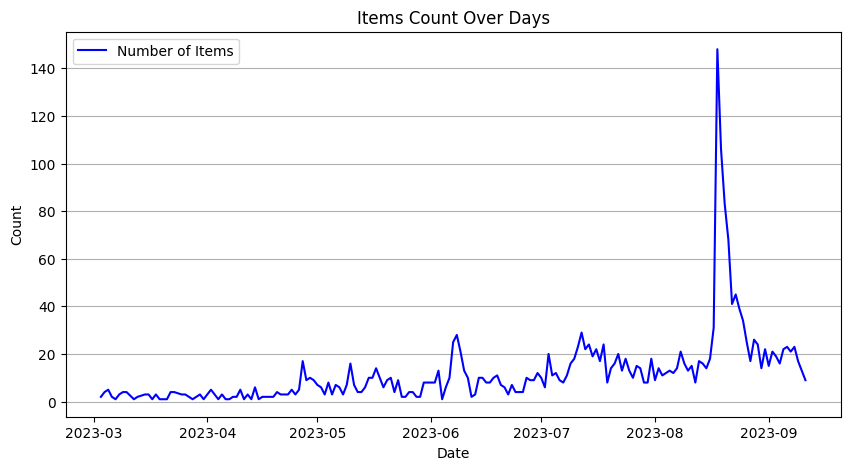

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded the dataframe 'df' and filtered it as in your code

df['time'] = pd.to_datetime(df['created_utc'], unit='s')

daily_counts = df.groupby(df['time'].dt.date).size()

plt.figure(figsize=(10, 5))
plt.plot(daily_counts.index, daily_counts, label='Number of Items', color='blue')

plt.title('Items Count Over Days')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y')
plt.show()

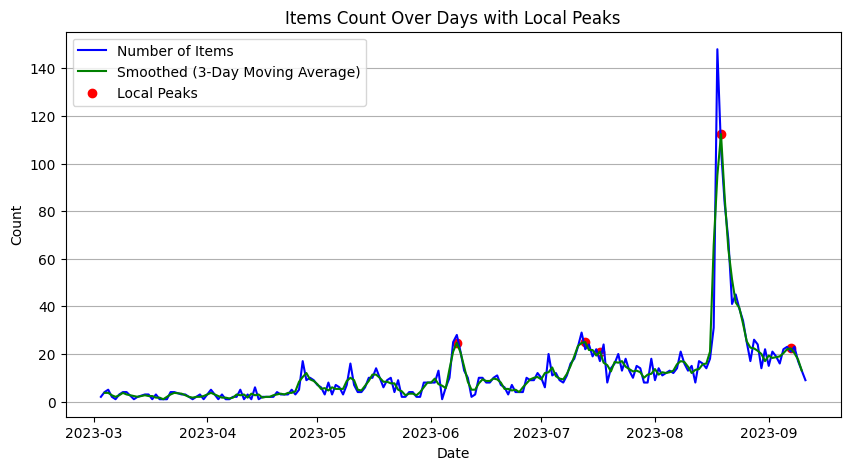

Dates of Local Peaks: Index([2023-06-08, 2023-07-13, 2023-07-17, 2023-08-19, 2023-09-07], dtype='object', name='time')


In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

df['time'] = pd.to_datetime(df['created_utc'], unit='s')

daily_counts = df.groupby(df['time'].dt.date).size()

window_size = 3
smoothed_counts = daily_counts.rolling(window=window_size, center=True).mean()

threshold = 20

peaks, _ = find_peaks(smoothed_counts, height=threshold)

plt.figure(figsize=(10, 5))
plt.plot(daily_counts.index, daily_counts, label='Number of Items', color='blue')
plt.plot(daily_counts.index, smoothed_counts, label=f'Smoothed ({window_size}-Day Moving Average)', color='green')
plt.scatter(daily_counts.index[peaks], smoothed_counts.iloc[peaks], color='red', marker='o', label='Local Peaks')

plt.title('Items Count Over Days with Local Peaks')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y')

plt.show()

peak_dates = daily_counts.index[peaks]
print("Dates of Local Peaks:", peak_dates)

#average of all datapoints for calculating a good threshold

In [46]:
for peak_date in peak_dates:
    print(peak_date)
    start_date = peak_date - pd.Timedelta(days=3)
    end_date = peak_date
    selected_rows = df[(df['time'].dt.date >= start_date) & (df['time'].dt.date <= end_date)]
    print(f"Peak at {peak_date} with {len(selected_rows)} items:")
    topic_mining(selected_rows)

2023-06-08
Peak at 2023-06-08 with 69 items:
Topic 1: lake, tribune, wildfire, williams, fire, due, wildfires, ridge, tumbler, smoke
Examples:
live from our district’s hecm course today when this part came up in the slideshow like 5 guys audibly gasped and one very seriously said “okay but what if i just swallow it” lol
williams lake fire department open house a success - mycariboonow.com  
cannabis retailer fire & flower files for court protection from creditors under ccaa  
canada minister bill blair: there are currently 414 wildfires burning across the country, with 239 of them classified as out of control. more than 20,000 people have been evacuated and hundreds of homes have been destroyed  
out-of-control wildfire on lower mainland sees massive growth  

Topic 2: fire, canada, wildfire, tax, smoke, lvt, land, vancouver, would, harrison
Examples:
vancouver fire rescue services on twitter - numerous set fires in the downtown eastside yesterday, including several garbage cans and du